# Movies 3

## Introduction

Une base de données (hébergée dans le cloud AWS) contenant un certain nombre de données cinématographiques vous est fournie pour exploration et mise en pratique des langages SQL et Python.  
Les données de connexion (user, host) sont indiquées dans le brief, le mot de passe nécessaire est précisé en session par le formateur.  


## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

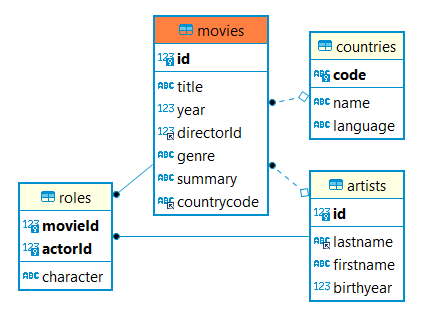

In [27]:
from IPython.display import Image
Image("C:/Users/levog/OneDrive/Images/Capture.png")

La base de données comprend 4 tables :

* _movies_ :
  * id : Identifiant unique du film
  * title : Titre du film
  * year : Année de sortie du film
  * directorID : Réalisateur du film
  * genre : Genre principal du film
  * summary : Résumé
  * countrycode : Code du pays du film


* _roles_ :
  * movieId : Identifiant du film
  * actorId : Identifiant de l'acteur
  * character : Personnage interprété par l'acteur
  
  
* _countries_ :
  * code : Code du pays du film
  * name : Nom du pays
  * language : Langue
  
  
* _artists_ :
  * id : Identifiant unique de l'artiste
  * lastname : Nom de famille de l'artiste
  * firstname : Prénom de l'artiste
  * birthyear : Année de naissance de l'artiste

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [2]:
import os
import pandas as pd

In [3]:
from sqlalchemy import create_engine
import pymysql

In [4]:
# paramètres de connexion à la base de données movies (MySQL sous AWS RDS)
user = os.environ.get('movies3_user')
password = os.environ.get('movies3_psw') 
host = os.environ.get('movies3_host')  
port = 3306
dbname = 'movies'  

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}")

### Exemples

#### Tables de base

In [4]:
movies = pd.read_sql_query("SELECT * FROM movies LIMIT 10", engine)
movies.head()

,id,title,year,directorId,genre,summary,countrycode
0,11,La Guerre des étoiles,1977,1,Aventure,"Il y a bien longtemps, dans une galaxie très l...",US
1,24,Kill Bill : Volume 1,2003,138,Action,Au cours d'une cérémonie de mariage en plein d...,US
2,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
3,33,Impitoyable,1992,190,Western,"Après avoir été un impitoyable tueur, toujours...",US
4,38,Eternal Sunshine of the Spotless Mind,2004,201,Science-Fiction,Joël et Clémentine ne voient plus que les mauv...,US


In [5]:
artists = pd.read_sql_query("SELECT * FROM artists LIMIT 10", engine)
artists.head()

,id,lastname,firstname,birthyear
0,1,Lucas,George,1944
1,2,Hamill,Mark,1951
2,3,Ford,Harrison,1942
3,4,Fisher,Carrie,1956
4,5,Cushing,Peter,1913


In [6]:
roles = pd.read_sql_query("SELECT * FROM roles LIMIT 10", engine)
roles.head()

,movieId,actorId,character
0,11,2,Luke Skywalker
1,1891,2,Luke Skywalker
2,1892,2,Luke Skywalker
3,181808,2,Luke Skywalker / Dobbu Scay (voice)
4,11,3,Han Solo


In [7]:
countries = pd.read_sql_query("SELECT * FROM countries LIMIT 10", engine)
countries.head()

,code,name,language
0,AU,Australia,
1,BE,Belgium,
2,BS,Bahamas,
3,CA,Canada,
4,CN,China,


#### Autre requête simple
Q00: Nom et année de naissance des artistes nés après 1975 ? Combien sont-ils ?

In [8]:
sql_query_00 = """
    SELECT *
    FROM artists
    WHERE birthyear > 1975
"""

results = pd.read_sql_query(sql_query_00, engine)
results.head(5)

,id,lastname,firstname,birthyear
0,131,Gyllenhaal,Jake,1980
1,205,Dunst,Kirsten,1982
2,225,Holmes,Ashton,1978
3,258,García Bernal,Gael,1978
4,368,Witherspoon,Reese,1976


In [9]:
results.shape

(118, 4)

In [10]:
len(results)

118

### Questions

Q01: Quels sont les films de type 'Drame' ? Combien cela représente de films ?  

In [5]:
sql_query_01 = """
SELECT *
FROM movies
WHERE genre="Drame"
"""

results1 = pd.read_sql_query(sql_query_01, engine)
results1

,id,title,year,directorId,genre,summary,countrycode
0,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
1,59,A History of Violence,2005,224,Drame,"Tom Stall, un père de famille à la vie paisibl...",US
2,116,Match point,2005,1243,Drame,Jeune professeur de tennis issu d'un milieu mo...,US
3,142,Le Secret de Brokeback Mountain,2005,1614,Drame,"Eté 1963, Wyoming.Deux jeunes cow-boys, Jack e...",CA
4,145,Breaking the Waves,1996,42,Drame,Au début des années soixante-dix sur la côte n...,DK
...,...,...,...,...,...,...,...
78,453352,Une vie violente,2017,550418,Drame,"Malgré la menace de mort qui pèse sur sa tête,...",FR
79,485162,En guerre,2018,7288,Drame,Malgré de lourds sacrifices financiers de la p...,FR
80,485166,Amanda,2018,931581,Drame,"Paris, de nos jours. David, la vingtaine, vit ...",FR
81,490132,Green Book : Sur les routes du sud,2018,7396,Drame,"En 1962, alors que règne la ségrégation, Tony ...",US


In [12]:
len(results1)

83

Q02: Quels rôles a joué Bruce Willis et dans quels films (triés par ordre chronologique) ?

In [7]:
sql_query_02 = """
SELECT title,`CHARACTER`, year
FROM movies
INNER JOIN roles ON movies.id = roles.movieId
INNER JOIN artists ON roles.actorId = artists.id
WHERE firstname = "Bruce" AND lastname = "Willis"
ORDER BY YEAR 
"""

results2 = pd.read_sql_query(sql_query_02, engine)
results2

,title,CHARACTER,year
0,Piège de cristal,John McClane,1988
1,58 minutes pour vivre,John McClane,1990
2,Pulp Fiction,Butch Coolidge,1994
3,Une Journée en enfer,John McClane,1995
4,Die Hard 4 : Retour en enfer,John McClane,2007


Q03: Qui est le réalisateur de Memento ?

In [17]:
sql_query_03 = """
SELECT lastname, firstname
FROM artists
INNER JOIN movies ON artists.id = directorId
WHERE title = "Memento"
"""

results3 = pd.read_sql_query(sql_query_03, engine)
results3

,lastname,firstname
0,Nolan,Christopher


Q04: Qui a joué le rôle de Chewbacca et dans quels films ?

In [8]:
sql_query_04 = """
SELECT lastname, firstname, title 
FROM movies
INNER JOIN roles ON movies.id = roles.movieId 
INNER JOIN artists ON roles.actorId = artists.id 
WHERE `character` = "Chewbacca"
"""

results4 = pd.read_sql_query(sql_query_04, engine)
results4

,lastname,firstname,title
0,Mayhew,Peter,La Guerre des étoiles
1,Mayhew,Peter,L'Empire contre-attaque
2,Mayhew,Peter,Le Retour du Jedi
3,Mayhew,Peter,Star Wars : Le Réveil de la Force
4,Suotamo,Joonas,Star Wars : Les Derniers Jedi


Q05: Dans quels films Bruce Willis a-t-il joué le role de John McClane ? 

In [19]:
sql_query_05 = """
SELECT title, lastname, firstname, roles.character
FROM movies
INNER JOIN roles ON movies.id = roles.movieId
INNER JOIN artists ON roles.actorId = artists.id
WHERE lastname = "Willis" AND firstname = "Bruce" AND roles.character = "John McClane"
"""

results5 = pd.read_sql_query(sql_query_05, engine)
results5

,title,lastname,firstname,character
0,Piège de cristal,Willis,Bruce,John McClane
1,Die Hard 4 : Retour en enfer,Willis,Bruce,John McClane
2,Une Journée en enfer,Willis,Bruce,John McClane
3,58 minutes pour vivre,Willis,Bruce,John McClane


Q06: Quels sont les acteurs de 'Sueurs froides' ?

In [20]:
sql_query_06 = """
    SELECT title AS "Titre", lastname AS "Nom", firstname AS "Prénom", roles.character AS "Rôle"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    INNER JOIN artists ON roles.actorId = artists.id
    WHERE title = "Sueurs froides";
"""

results6 = pd.read_sql_query(sql_query_06, engine)
results6

,Titre,Nom,Prénom,Rôle
0,Sueurs froides,Stewart,James,Det. John 'Scottie' Ferguson
1,Sueurs froides,Novak,Kim,Madeleine Elster / Judy Barton
2,Sueurs froides,Bel Geddes,Barbara,Marjorie 'Midge' Wood


Q07: Quels sont les films dont le réalisateur est Tim Burton, et l’un des acteurs Jonnhy Depp ?

In [10]:
sql_query_07 = """
SELECT title
FROM movies
INNER JOIN (
SELECT artists.id
FROM artists
INNER JOIN movies ON artists.id = movies.directorId
WHERE lastname = "Burton"
) AS r
INNER JOIN roles ON movies.id = roles.movieId 
INNER JOIN artists ON roles.actorId = artists.id
WHERE lastname = "Depp"
"""

results7 = pd.read_sql_query(sql_query_07, engine)
results7

,title
0,"Sleepy Hollow, La Légende du cavalier sans tête"


Q08: Quels sont les films dans lesquels a joué Woody Allen ? Donnez aussi le rôle.

In [11]:
sql_query_08 = """
SELECT title, `character`
FROM movies
INNER JOIN roles ON movies.id = roles.movieId
INNER JOIN artists ON roles.actorId = artists.id
WHERE artists.lastname = "Allen" AND artists.firstname = "Woody"
"""

results8 = pd.read_sql_query(sql_query_08, engine)
results8

,title,character
0,Scoop,Sid Waterman
1,Manhattan,Isaac Davis
2,Annie Hall,Alvy Singer
3,Maris et femmes,Prof. Gabriel 'Gabe' Roth


Q09: Quel metteur en scène a tourné dans ses propres films ? Donnez le nom, le rôle et le titre des films en question.

In [12]:
sql_query_09 = """
SELECT title, lastname, firstname, `character`
FROM movies
INNER JOIN roles ON movies.id = roles.movieId
INNER JOIN artists ON roles.actorId = artists.id
WHERE roles.actorId = movies.directorId
"""

results9 = pd.read_sql_query(sql_query_09, engine)
results9

,title,lastname,firstname,character
0,Impitoyable,Eastwood,Clint,Bill Munny
1,Reservoir Dogs,Tarantino,Quentin,Mr. Brown
2,Scoop,Allen,Woody,Sid Waterman
3,Pulp Fiction,Tarantino,Quentin,Jimmie Dimmick
4,Manhattan,Allen,Woody,Isaac Davis
5,Annie Hall,Allen,Woody,Alvy Singer
6,Chantons sous la pluie,Kelly,Gene,Don Lockwood
7,Le dictateur,Chaplin,Charlie,"Adenoid Hynkel, Dictator of Tomania / A Jewish..."
8,Le Bal des vampires,Polanski,Roman,"Alfred, Assistent des Professors"
9,Les temps modernes,Chaplin,Charlie,A factory worker


Q10: Quels sont les films de Quentin Tarantino dans lesquels il n’a pas joué 

In [13]:
sql_query_10 = """
SELECT *
FROM movies
INNER JOIN artists ON movies.directorId = artists.id
WHERE artists.lastname = "Tarantino"
EXCEPT
SELECT *
FROM roles
INNER JOIN movies ON roles.movieId = movies.id
INNER JOIN artists ON roles.actorId = artists.id
WHERE artists.lastname = "Tarantino"
"""

results10 = pd.read_sql_query(sql_query_10, engine)
results10

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'EXCEPT\nSELECT *\nFROM roles\nINNER JOIN movies ON roles.movieId = movies.id\nINNER ' at line 5")
[SQL: 
SELECT *
FROM movies
INNER JOIN artists ON movies.directorId = artists.id
WHERE artists.lastname = "Tarantino"
EXCEPT
SELECT *
FROM roles
INNER JOIN movies ON roles.movieId = movies.id
INNER JOIN artists ON roles.actorId = artists.id
WHERE artists.lastname = "Tarantino"
]
(Background on this error at: http://sqlalche.me/e/13/f405)

Q11: Quel metteur en scène a tourné en tant qu’acteur ? Donner le nom, le rôle et le titre des films dans lesquels cet artiste a joué.

Q12: Quels sont les films de Hitchcock sans James Stewart

In [25]:
sql_query_12 = """
SELECT title
FROM movies
INNER JOIN artists ON movies.directorId = artists.id 
WHERE lastname = "Hitchcock"
EXCEPT
SELECT title
FROM movies
INNER JOIN roles ON movies.id = roles.movieId 
INNER JOIN artists ON roles.actorId = artists.id
WHERE lastname = "Stewart" AND firstname = "James"
"""

results12 = pd.read_sql_query(sql_query_12, engine)
results12

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'EXCEPT\nSELECT title\nFROM movies\nINNER JOIN roles ON movies.id = roles.movieId \nI' at line 5")
[SQL: 
SELECT title
FROM movies
INNER JOIN artists ON movies.directorId = artists.id 
WHERE lastname = "Hitchcock"
EXCEPT
SELECT title
FROM movies
INNER JOIN roles ON movies.id = roles.movieId 
INNER JOIN artists ON roles.actorId = artists.id
WHERE lastname = "Stewart" AND firstname = "James"
]
(Background on this error at: http://sqlalche.me/e/13/f405)

Q13: Quel est la filmographie de James Stewart ?

In [15]:
sql_query_13 = """
SELECT *
FROM roles
INNER JOIN movies ON movies.id = roles.movieId 
INNER JOIN artists ON roles.actorId = artists.id
WHERE firstname = "James" AND lastname = "Stewart"
"""

results13 = pd.read_sql_query(sql_query_13, engine)
results13

,movieId,actorId,character,id,title,year,directorId,genre,summary,countrycode,id,lastname,firstname,birthyear
0,426,854,Det. John 'Scottie' Ferguson,426,Sueurs froides,1958,2636,Mystère,"Scottie est sujet au vertige, ce qui lui porte...",US,854,Stewart,James,1908
1,567,854,L.B. Jefferies,567,Fenêtre sur cour,1954,2636,Drame,"À cause d'une jambe cassée, le reporter-photog...",US,854,Stewart,James,1908
2,574,854,Dr. Ben McKenna,574,L'homme qui en savait trop,1956,2636,Aventure,En vacances au Maroc avec sa femme et son fils...,US,854,Stewart,James,1908


Q14: Quels sont les films sans rôle (acteurs) ?

In [ ]:
sql_query_14 = """
SELECT *
FROM movies
EXCEPT
SELECT title, count(*)
FROM movies
INNER JOIN roles ON movies.id = roles.movieId 
GROUP BY movieId
"""

results14 = pd.read_sql_query(sql_query_14, engine)
results14

Q15: Combien d'acteurs n’ont jamais réalisé de film ? 

In [ ]:
results15 = pd.read_sql_query(sql_query_15, engine)
results15

Q16: Donnez les noms et prénoms des 10 réalisateurs les plus prolifiques, ainsi que le nombre de films qu’ils ont tournés ?

In [23]:
sql_query_16 = """
SELECT lastname, firstname, count(*)
FROM artists
INNER JOIN movies ON artists.id = movies.directorId 
GROUP BY directorId 
ORDER BY count(*) DESC
LIMIT 10
"""

results16 = pd.read_sql_query(sql_query_16, engine)
results16

,lastname,firstname,count(*)
0,Spielberg,Steven,13
1,Hitchcock,Alfred,10
2,Allen,Woody,8
3,Tarantino,Quentin,7
4,Kubrick,Stanley,7
5,Nolan,Christopher,6
6,Ford Coppola,Francis,6
7,Scott,Ridley,6
8,Polanski,Roman,6
9,Lucas,George,5


Q17: Donnez les noms et prénoms des réalisateurs qui ont tourné au moins deux films. Combien sont-ils ?

In [ ]:
results17 = pd.read_sql_query(sql_query_17, engine)
results17

Q18: Dans quels films le réalisateur a-t-il le même prénom que l’un des interprètes ? (titre, nom du réalisateur, nom de l’interprète). Le réalisateur et l’interprète ne doivent pas être la même personne.

In [ ]:
results18 = pd.read_sql_query(sql_query_18, engine)
results18

Q19: Quels sont les 10 pays produisant le plus de films ?

In [17]:
sql_query_19 = """
SELECT name, count(*)
FROM countries
INNER JOIN movies ON countries.code = movies.countrycode
GROUP BY code
ORDER BY count(*) DESC
LIMIT 10
"""

results19 = pd.read_sql_query(sql_query_19, engine)
results19

,name,count(*)
0,Etats-Unis,131
1,France,39
2,Royaume-Uni,21
3,Canada,6
4,Allemagne,5
5,Italie,5
6,Japan,4
7,Australia,3
8,Suède,3
9,Belgium,2


Q20: Quels sont les 5 acteurs ayant le plus joué dans des films français ?

In [22]:
sql_query_20 = """
SELECT lastname AS Nom, firstname AS Prénom, count(*) As "Nombre de films"
FROM artists
INNER JOIN roles ON artists.id = roles.actorId 
INNER JOIN movies ON roles.movieId = movies.id
INNER JOIN countries ON countries.code = movies.countrycode 
WHERE name = "France"
GROUP BY artists.id
ORDER BY count(*) DESC
LIMIT 5
"""

results20 = pd.read_sql_query(sql_query_20, engine)
results20

,Nom,Prénom,Nombre de films
0,Deneuve,Catherine,3
1,Belmondo,Jean-Paul,3
2,Piccoli,Michel,3
3,Fresnay,Pierre,2
4,Arestrup,Niels,2


---

## 3. Expression libre

A vous de jouer ! Tentez quelques requêtes de votre choix (avec pourquoi pas quelques graphiques illustratifs en utilisant Matplotlib...)